## Driver dataset

- Lithion Power is the provider of electric vehicle(e-vehicle) batteries.
- Lithion Power specialize in Battery Management System (BMS) upto 72V system.  Lithion BMS are designed and manufactured for Electric Vehicles, Telecom and ESS ("Energy Storage System") uses.
- It provides battery on a rental model to e-vehicle drivers. 
- Drivers rent battery typically for a day and then replace it with a charged battery from the company. 
- Lithionpower has a variable pricing model based on driver's driving history. 
- Battery life depends on factors such as over speeding, distance driven per day, etc.

## Objective:

- Create a cluster model where drivers can be grouped together based on the driving data.
- Group the datapoints so that drivers will be incentivized based on the cluster.

In [2]:
# importing libraries
import pandas as pd                  # Preparing high-level data sets, etc.
import numpy as np                   # library for multi-dimensional array, matrix processing, etc.
import matplotlib.pyplot as plt      # Visualization Library
import seaborn as sns                # Visualization Library 
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
# Load the data
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
df.shape

(4000, 3)

In [5]:
df.duplicated().sum()

## Tell duplicate values in the DataFrame

0

In [6]:
# Drop the 'id' column
df = df.drop('id', axis=1)

In [7]:
df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [8]:
df.shape

(4000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_dist_day,4000.0,76.041522,53.469563,15.52,45.2475,53.33,65.6325,244.79
mean_over_speed_perc,4000.0,10.721000,13.708543,0.00,4.0000,6.00,9.0000,100.00


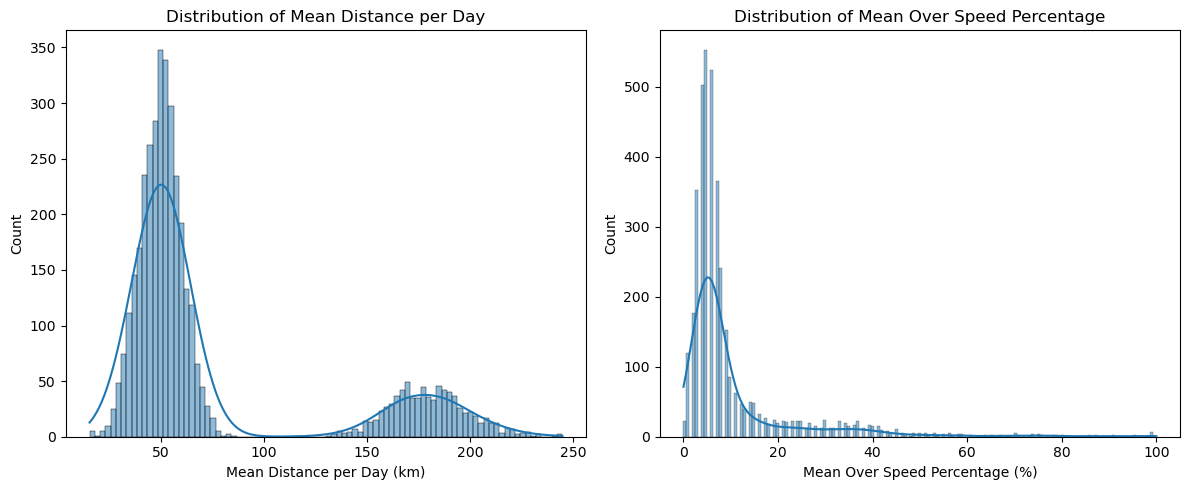

Histograms created for the original dataset (excluding 'id' column).
Summary Statistics:
       mean_dist_day  mean_over_speed_perc
count    4000.000000           4000.000000
mean       76.041522             10.721000
std        53.469563             13.708543
min        15.520000              0.000000
25%        45.247500              4.000000
50%        53.330000              6.000000
75%        65.632500              9.000000
max       244.790000            100.000000


In [11]:
# Create histograms
plt.figure(figsize=(12, 5))

# Histogram for mean_dist_day
plt.subplot(1, 2, 1)
sns.histplot(df['mean_dist_day'], kde=True)
plt.title('Distribution of Mean Distance per Day')
plt.xlabel('Mean Distance per Day (km)')

# Histogram for mean_over_speed_perc
plt.subplot(1, 2, 2)
sns.histplot(df['mean_over_speed_perc'], kde=True)
plt.title('Distribution of Mean Over Speed Percentage')
plt.xlabel('Mean Over Speed Percentage (%)')

plt.tight_layout()
plt.show()

print("Histograms created for the original dataset (excluding 'id' column).")

# Display summary statistics
print("\
Summary Statistics:")
print(df.describe())

## Outlier analysis complete

In [12]:
# Function to calculate outliers
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


# Find outliers for both columns
outliers_dist = find_outliers(df, 'mean_dist_day')
outliers_speed = find_outliers(df, 'mean_over_speed_perc')

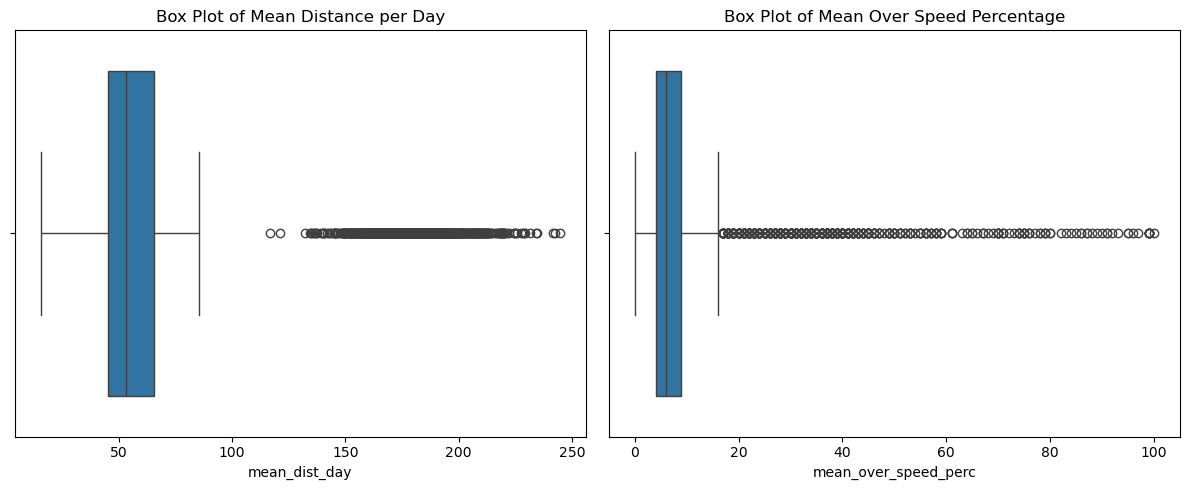

In [13]:
# Create box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['mean_dist_day'])
plt.title('Box Plot of Mean Distance per Day')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['mean_over_speed_perc'])
plt.title('Box Plot of Mean Over Speed Percentage')
plt.tight_layout()
plt.show()

In [14]:
column = ["mean_dist_day","mean_over_speed_perc"]

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers for the specific column
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]


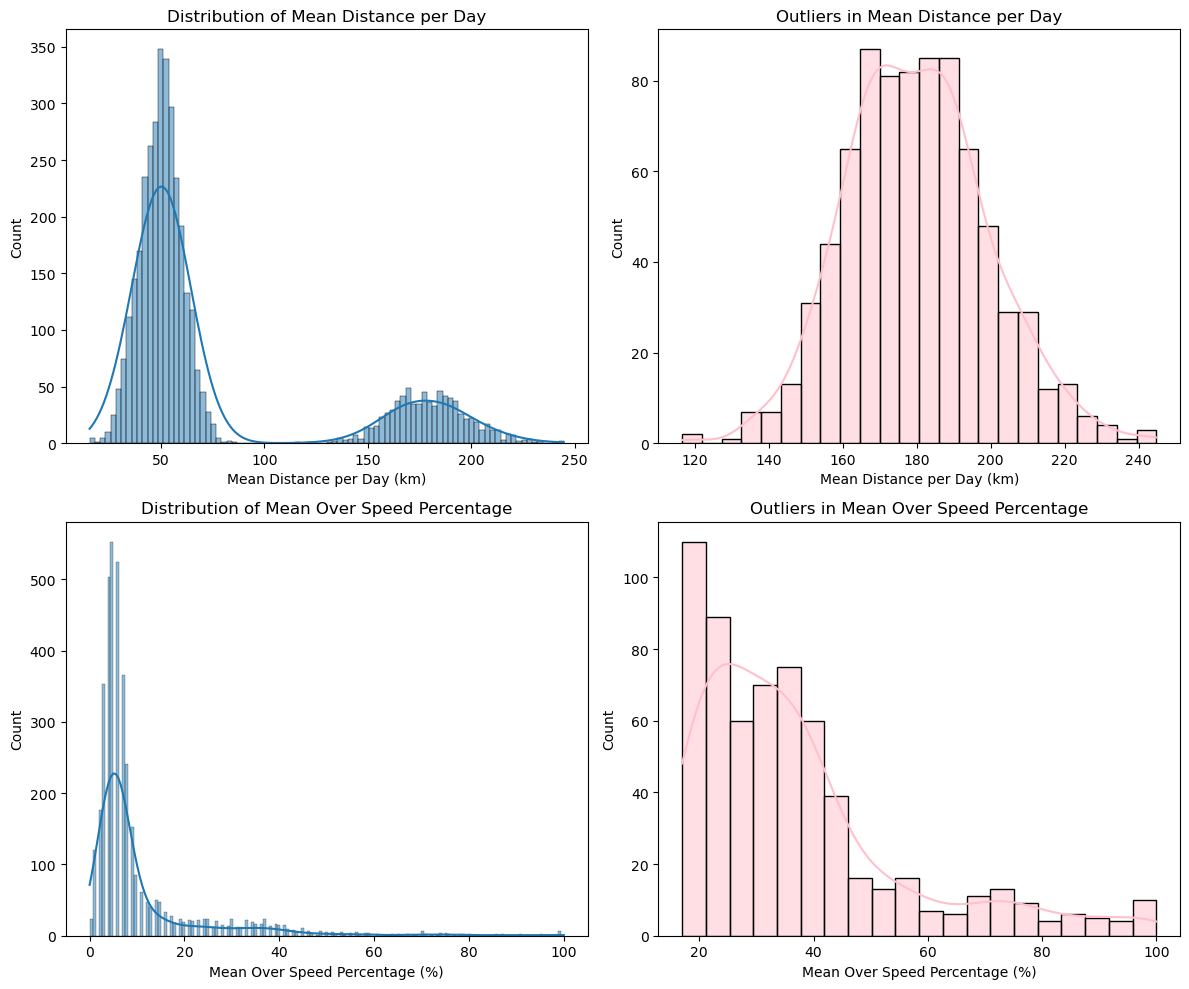

Histograms and KDE plots created for the dataset and its outliers.


In [15]:
# Create histograms and KDE plots
plt.figure(figsize=(12, 10))

# Histogram and KDE for mean_dist_day
plt.subplot(2, 2, 1)
sns.histplot(df['mean_dist_day'], kde=True)
plt.title('Distribution of Mean Distance per Day')
plt.xlabel('Mean Distance per Day (km)')

plt.subplot(2, 2, 2)
sns.histplot(outliers['mean_dist_day'], kde=True, color='pink')
plt.title('Outliers in Mean Distance per Day')
plt.xlabel('Mean Distance per Day (km)')

# Histogram and KDE for mean_over_speed_perc
plt.subplot(2, 2, 3)
sns.histplot(df['mean_over_speed_perc'], kde=True)
plt.title('Distribution of Mean Over Speed Percentage')
plt.xlabel('Mean Over Speed Percentage (%)')

plt.subplot(2, 2, 4)
sns.histplot(outliers['mean_over_speed_perc'], kde=True, color='pink')
plt.title('Outliers in Mean Over Speed Percentage')
plt.xlabel('Mean Over Speed Percentage (%)')

# Save the plot to a file
## plt.savefig('histogram.png', dpi=1000)
plt.tight_layout()
plt.show()

print("Histograms and KDE plots created for the dataset and its outliers.")

The image shows four histograms that visualize distributions and outliers related to mean distances and speed percentages. Here’s a breakdown of the insights:

### Top Left: Distribution of Mean Distance per Day
- **Skewed Distribution**: The histogram shows a right-skewed distribution with most data points concentrated between 40 to 80 km/day.
- **Bimodal Pattern**: There’s a smaller secondary peak around 150–200 km/day, suggesting a possible subgroup or different behavior within the dataset.
- **Insights**: The majority of days have lower distances traveled, but a subset might represent long-distance or high-activity days.

### Top Right: Outliers in Mean Distance per Day
- **Bimodal Distribution**: Outliers show a more prominent bimodal distribution. Clusters are observed both at low (50–80 km) and high (150–200 km) distances.
- **Outlier Characteristics**: The presence of outliers in both low and high ranges indicates diverse behavior, possibly due to varying travel patterns, occasional long trips, or irregular events.

### Bottom Left: Distribution of Mean Over Speed Percentage
- **Highly Skewed Distribution**: Most data points lie below 20%, indicating that drivers rarely exceed speed limits by large margins.
- **Long Tail**: The long right tail suggests some occurrences of significant speeding (up to 100%), though these are rare.

### Bottom Right: Outliers in Mean Over Speed Percentage
- **Outlier Cluster at Low Values**: Most outliers are below 20%, showing that outliers generally involve modest speeding.
- **Rare High-Speed Outliers**: A few cases exceed 50% over speed, representing extreme behavior.

### Key Takeaways:
- **Behavior Clusters**: Both distance and speed show clear clusters. These may represent distinct user segments or travel patterns, like daily commuters versus occasional long-distance travelers.
- **Outlier Analysis**: Outliers reveal more significant variation in behavior, especially in distances, where there is a split between regular and high-distance days.
- **Speeding Patterns**: Even outliers in speeding are mostly low, indicating that while deviations occur, extreme speeding is infrequent.

## In the code, Robust Scaler is used because the dataset has outliers.

Head of robustly scaled data without 'id' column:
   mean_dist_day  mean_over_speed_perc
0       0.878587                   4.4
1      -0.039245                   3.8
2       0.549914                   4.2
3       0.115771                   3.2
4       0.061320                   3.8


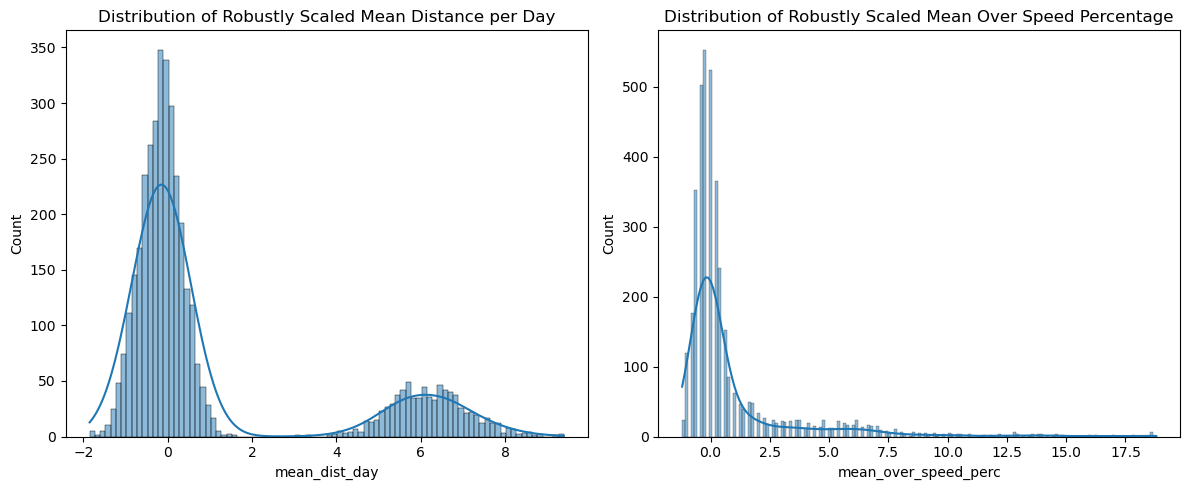

Robust scaling complete on dataset without 'id' column.


In [16]:
from sklearn.preprocessing import RobustScaler


# Perform robust scaling
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Head of robustly scaled data without 'id' column:")
print(df_scaled.head())

# Plot the distribution of the robustly scaled features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_scaled['mean_dist_day'], kde=True)
plt.title('Distribution of Robustly Scaled Mean Distance per Day')
plt.subplot(1, 2, 2)
sns.histplot(df_scaled['mean_over_speed_perc'], kde=True)
plt.title('Distribution of Robustly Scaled Mean Over Speed Percentage')
plt.tight_layout()
plt.show()

print("Robust scaling complete on dataset without 'id' column.")

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

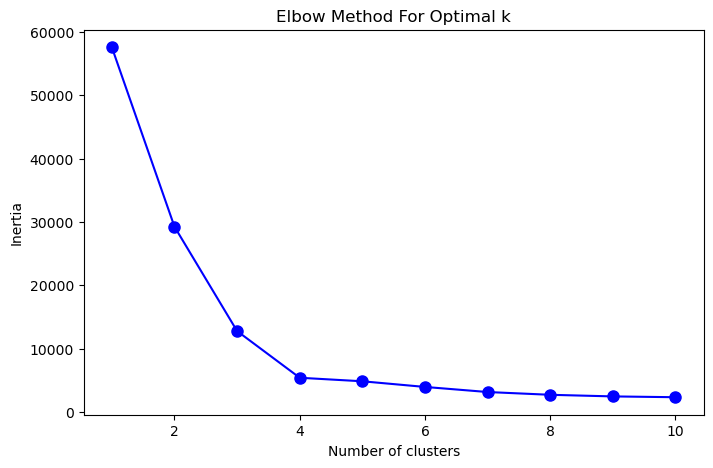

In [19]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
# Choose the optimal number of clusters (let's say it's 3 based on the Elbow method)
optimal_k = 4

# Fit K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

print(f"Head of the data with assigned clusters:")
df_scaled.head()

Head of the data with assigned clusters:


,mean_dist_day,mean_over_speed_perc,cluster
0,0.878587,4.4,2
1,-0.039245,3.8,2
2,0.549914,4.2,2
3,0.115771,3.2,2
4,0.061320,3.8,2


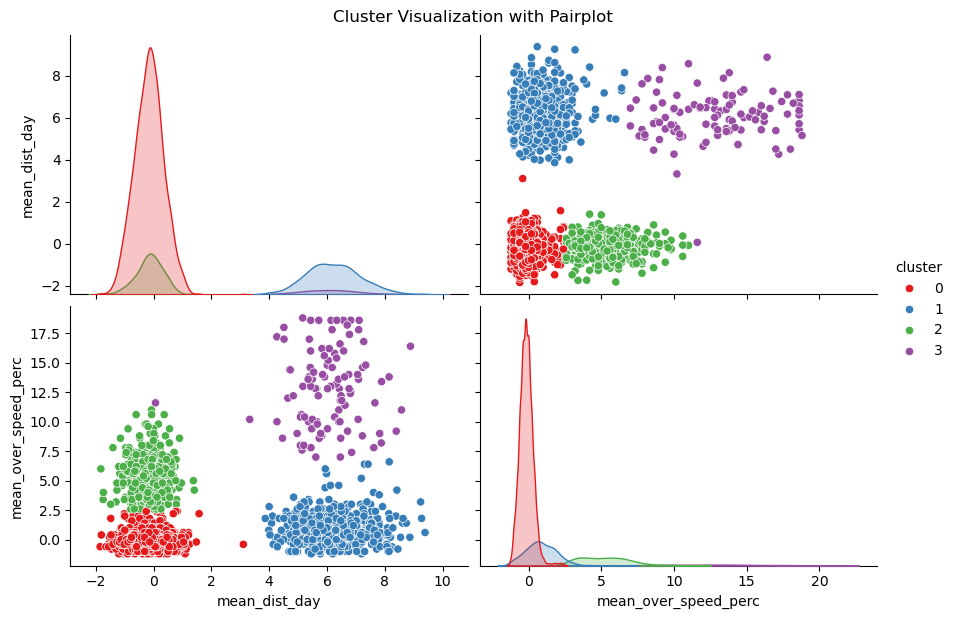

In [21]:
# Pair plot to visualize clusters
sns.pairplot(df_scaled, hue='cluster', palette='Set1', diag_kind='kde', height=3, aspect=1.5)
plt.suptitle('Cluster Visualization with Pairplot', y=1.02)
plt.savefig("Pair Plot -- Driver Data", dpi=1080)
plt.show()

The figure is a pair plot that visualizes the relationships between two key features: "mean distance per day" (x-axis) and "mean overspeed percentage" (y-axis). The plot includes scatter plots along with kernel density estimates (KDE) for each feature, segmented by clusters (red, blue, green, purple).

### Cluster Analysis:

1. **Cluster 0 (Red)**:
   - **Low Mean Distance, Low Mean Overspeed Percentage**:
     - These drivers have a very low mean distance per day (around 0) and maintain almost zero overspeeding.
     - **Insight**: These are likely short-distance, highly cautious drivers, perhaps urban commuters or drivers operating in heavily congested areas.
     - **Recommendation**: Provide small but consistent incentives, such as monthly rewards for maintaining this safe profile.

2. **Cluster 1 (Blue)**:
   - **Moderate to High Mean Distance, Low Mean Overspeed Percentage**:
     - Drivers in this cluster cover moderate to high distances (around 4-8 units) with very low overspeeding percentages.
     - **Insight**: These drivers maintain safe behavior over long distances, likely indicating disciplined, experienced drivers.
     - **Recommendation**: Offer tiered rewards based on distance milestones while keeping their overspeed percentage low. This can encourage them to maintain safe habits even with extended driving.

3. **Cluster 2 (Green)**:
   - **Low Mean Distance, Moderate Mean Overspeed Percentage**:
     - These drivers have low daily distances (close to 0) but show higher overspeed percentages compared to Cluster 0.
     - **Insight**: These drivers might engage in short trips with bursts of speed, possibly due to impatience or urban driving conditions.
     - **Recommendation**: Implement behavioral training incentives to help them control impulsive speeding and reward gradual improvements in overspeed percentage.

4. **Cluster 3 (Purple)**:
   - **Moderate to High Mean Distance, High Mean Overspeed Percentage**:
     - Drivers in this cluster cover moderate to high distances (4-8 units) but have elevated overspeed percentages (10-15%).
     - **Insight**: These drivers might be more aggressive or take risks, especially on highways or long trips.
     - **Recommendation**: Use a combination of penalties and significant rewards to incentivize reduction in their overspeeding. Offering coaching or safe driving workshops may be essential.

### KDE Observations:
- The KDE plots along the diagonal show the distribution of mean distance and mean overspeed percentage within each cluster.
- **Cluster 0 (Red)** has a sharp peak close to zero, indicating a concentrated group of safe, short-distance drivers.
- **Cluster 1 (Blue)** has a broad peak in the mid-to-high range for distance, but its overspeeding distribution remains close to zero, reinforcing its low-risk profile.
- **Cluster 2 (Green)** and **Cluster 3 (Purple)** have wider spreads in their distributions, with more variation in their behaviors, especially in overspeeding.

### Key Insights for Incentive Design:
1. **Custom Incentives by Cluster**:
   - Tailor rewards based on the specific characteristics of each cluster. For example, Cluster 1 could be rewarded for consistently maintaining low overspeed percentages, while Cluster 3 should receive rewards for reducing risky driving behavior.

2. **Intervention Strategies**:
   - Focus interventions like training or personalized feedback more heavily on Cluster 2 and Cluster 3, where risky behavior is more evident.

3. **Distance-Based Rewards**:
   - For clusters with higher mean distances (Clusters 1 and 3), implement distance-based incentives that also consider overspeed behavior. Encourage safe driving even during extended trips.

4. **Proactive Monitoring**:
   - Clusters with mixed behavior (especially Cluster 2) may benefit from real-time monitoring and immediate feedback, rewarding instant improvements.

### Conclusion:
This pair plot provides a clear segmentation of drivers based on their distance and speeding behavior. Leveraging these insights, you can develop targeted incentive strategies that reduce risky driving and encourage safe habits across different driver profiles.

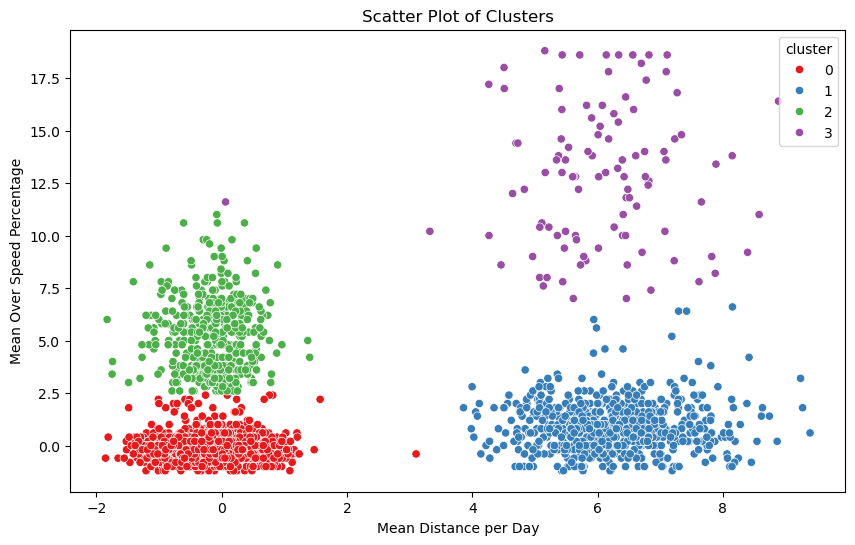

In [22]:
# Alternatively, a scatter plot for two features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['mean_dist_day'], y=df_scaled['mean_over_speed_perc'], hue=df_scaled['cluster'], palette='Set1')
plt.title('Scatter Plot of Clusters')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.show()

In [23]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled.drop('cluster', axis=1), df_scaled['cluster'])
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}")


Silhouette Score for 4 clusters: 0.79


In [24]:
# Find count of each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
print("Count of each cluster")
print(dict_data)

Count of each cluster
{0: 2774, 1: 695, 2: 426, 3: 105}


In [25]:
# Print the data
print("Data with clusters\n")
df_scaled.head()

Data with clusters



,mean_dist_day,mean_over_speed_perc,cluster
0,0.878587,4.4,2
1,-0.039245,3.8,2
2,0.549914,4.2,2
3,0.115771,3.2,2
4,0.061320,3.8,2


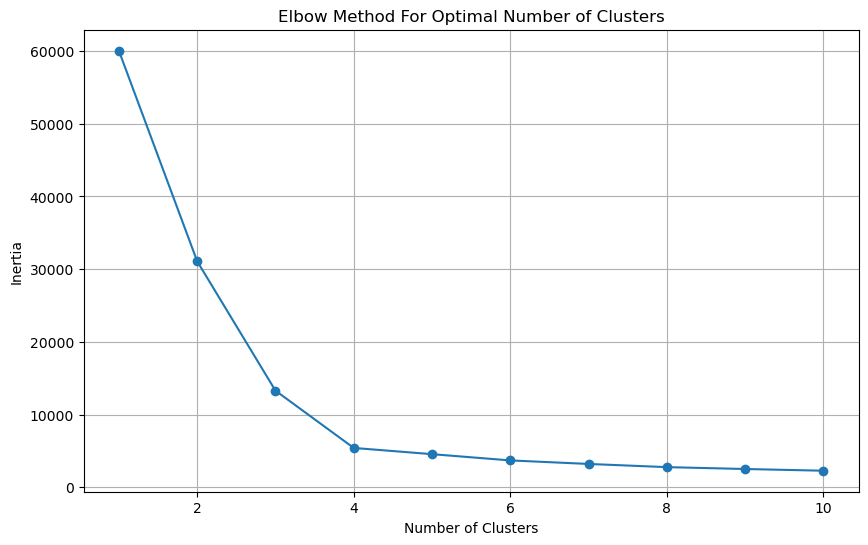

In [26]:
# Determine the optimal number of clusters using the Elbow method

from sklearn.cluster import KMeans

# inertia means  WCSS(Within-Cluster Sum of Squares) 
inertia = []  # This list will store the WCSS for each value of k
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
# n_init is a parameter that controls the number of times the KMeans algorithm is run with different initial centroid seeds.
    kmeans = KMeans(n_clusters=n_clusters,n_init=10)  
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [27]:
# Let's assume the optimal number of clusters is 4 (based on the elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

In [28]:
print(kmeans.cluster_centers_)

[[-1.62539287e-01 -1.59192502e-01 -1.08801856e-14]
 [ 6.23521527e+00  9.05899281e-01  1.00000000e+00]
 [-1.43978416e-01  5.25821596e+00  2.00000000e+00]
 [ 6.05010220e+00  1.28457143e+01  3.00000000e+00]]


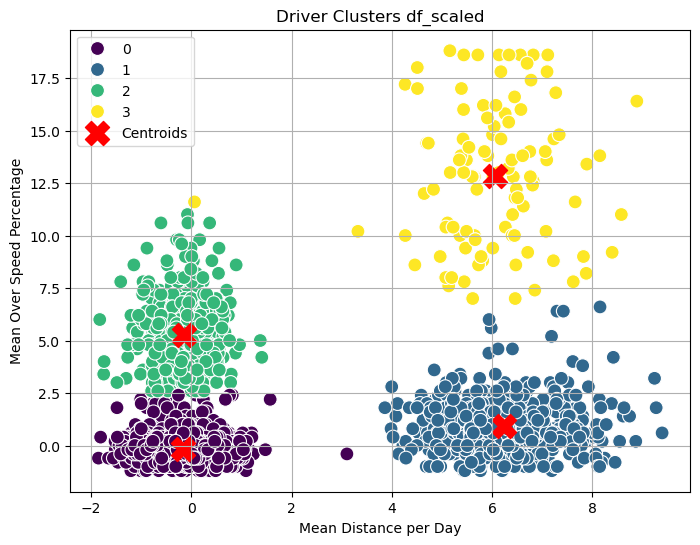

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean_dist_day', y='mean_over_speed_perc', hue='cluster', data=df_scaled, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Driver Clusters df_scaled')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.legend()
plt.grid(True)
plt.savefig("Driver Clusters df_scaled", dpi=1080)
plt.show()


Here’s a deeper analysis of the clusters and their implications:

### Cluster 0 (Purple):
- **Driver Profile**: Low-risk, possibly cautious or occasional drivers.
- **Mean Distance per Day**: ~50 units.
- **Mean Over Speed Percentage**: ~0-20%.
- **Insights**: These drivers typically stay within speed limits and drive short distances. They could be commuters, local drivers, or individuals who primarily use their vehicles for short trips. Given their cautious driving patterns, they might be less likely to be involved in speeding-related incidents.

### Cluster 1 (Blue):
- **Driver Profile**: Consistent and possibly professional or long-distance drivers.
- **Mean Distance per Day**: ~180-220 units.
- **Mean Over Speed Percentage**: ~0-20%.
- **Insights**: These drivers cover significant distances while maintaining low levels of overspeeding. They might be disciplined drivers, such as delivery or logistics personnel who are mindful of speed regulations. The combination of high daily mileage and low overspeed percentage suggests they have a lower risk profile despite their longer time on the road.

### Cluster 2 (Green):
- **Driver Profile**: Moderate-risk, potentially overconfident drivers.
- **Mean Distance per Day**: ~50 units.
- **Mean Over Speed Percentage**: ~20-60%.
- **Insights**: These drivers are less cautious, frequently exceeding speed limits while only covering moderate distances. They might be urban drivers or people who are more likely to engage in risky behavior during short trips. This group is more likely to be involved in speeding violations and accidents than clusters 0 and 1.

### Cluster 3 (Yellow):
- **Driver Profile**: High-risk, aggressive drivers.
- **Mean Distance per Day**: ~150 units.
- **Mean Over Speed Percentage**: ~60-100%.
- **Insights**: These drivers exhibit the most dangerous behavior, frequently speeding while driving moderate distances. They might be thrill-seekers or drivers who often rush to destinations. This group is at the highest risk of accidents due to their aggressive driving habits and high overspeeding percentage.

### General Trends:
- **Distance vs. Speeding**: There’s an inverse relationship between the average distance driven and the likelihood of overspeeding. Drivers who cover longer distances tend to maintain safer speed levels, while those driving shorter distances are more prone to overspeeding.
- **Behavioral Clustering**: The figure successfully separates distinct driver behaviors, indicating that these four clusters are significantly different in terms of driving habits. This suggests targeted interventions (like training or incentives) could be effective if tailored to each group’s characteristics.

### Applications:
- **Insurance Risk Assessment**: Insurers can use these clusters to develop differentiated premiums. For instance, Cluster 3 drivers might face higher premiums due to their high-risk behavior.
- **Fleet Management**: Companies can identify which drivers need training or monitoring. Clusters 2 and 3, for example, might benefit from speed management systems.
- **Urban Planning and Traffic Management**: Understanding these clusters helps in designing better road safety campaigns, targeting the specific risky behaviors observed in Cluster 2 and Cluster 3.

These insights provide a comprehensive understanding of driver behavior and risk, allowing for data-driven decision-making in various applications.

## Agglomerative Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
agg_clusters = agg_cluster.fit_predict(df_scaled)

# Add the Agglomerative Clustering labels to the dataset
df_scaled['Agg_Cluster'] = agg_clusters

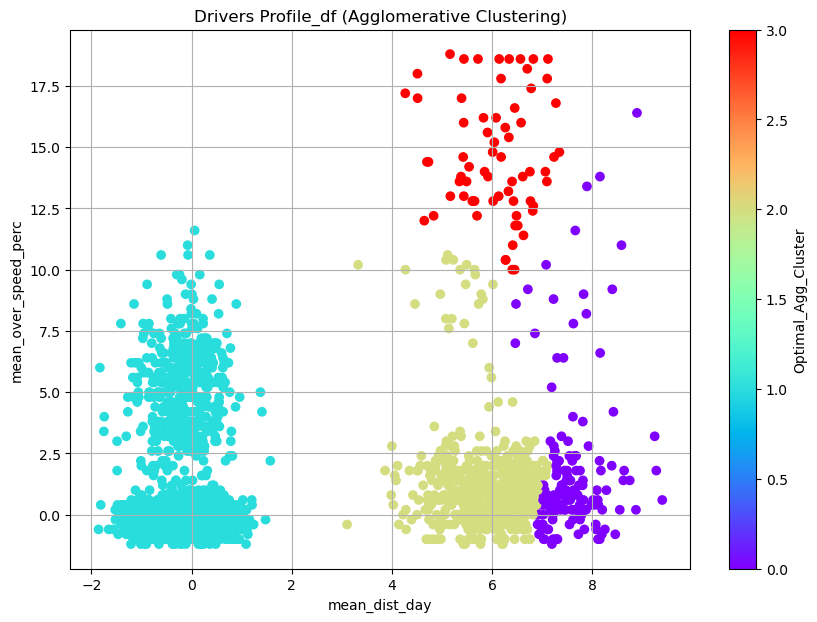

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(df_scaled['mean_dist_day'], df_scaled['mean_over_speed_perc'], c=df['Agg_Cluster'], cmap='rainbow', marker='o')
plt.title('Drivers Profile_df (Agglomerative Clustering)')
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.colorbar(label='Optimal_Agg_Cluster')
plt.grid(True)
plt.show()

## Silhouette Analysis

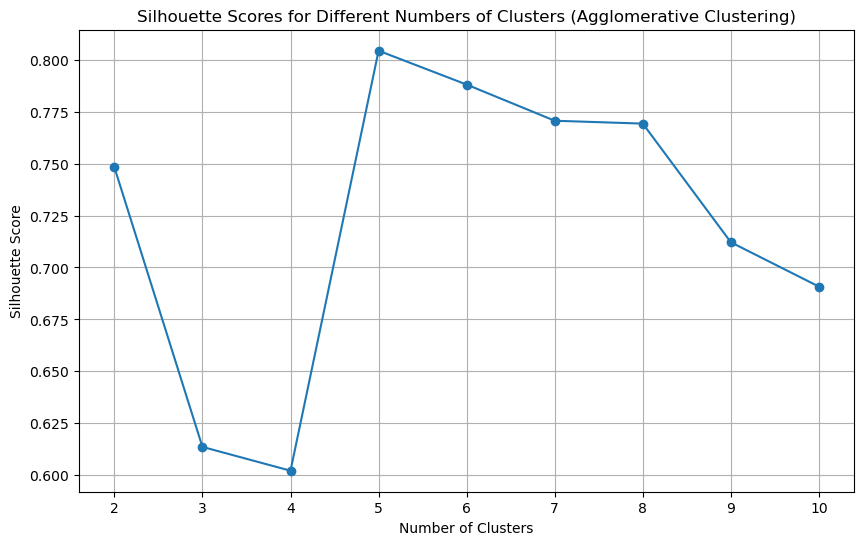

The optimal number of clusters are 5


In [35]:
# Compute silhouette scores for a range of cluster numbers
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = range(2, 11)  # Testing from 2 to 10 clusters

for n_clusters in range_n_clusters:
    agg_cluster_test = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='complete')
    cluster_labels = agg_cluster_test.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Identify the number of clusters with the highest silhouette score
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters are {optimal_clusters}")


In [36]:
# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled.drop('cluster', axis=1), df_scaled['cluster'])
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}")

Silhouette Score for 4 clusters: 0.80


### Let us use 5 clusters

## K-mean Clustering

In [37]:
# Let's assume the optimal number of clusters is 5 (based on the elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)


In [38]:
print(kmeans.cluster_centers_)

[[ 6.22858807e+00  8.61248186e-01  1.00000000e+00  4.35413643e-03]
 [-1.62539287e-01 -1.59192502e-01 -1.08801856e-14  4.05231404e-15]
 [-1.43496475e-01  5.27306792e+00  2.00234192e+00  2.00000000e+00]
 [ 6.12594479e+00  1.49723077e+01  3.00000000e+00  3.00000000e+00]
 [ 6.19977652e+00  8.89333333e+00  2.73333333e+00  1.00000000e+00]]


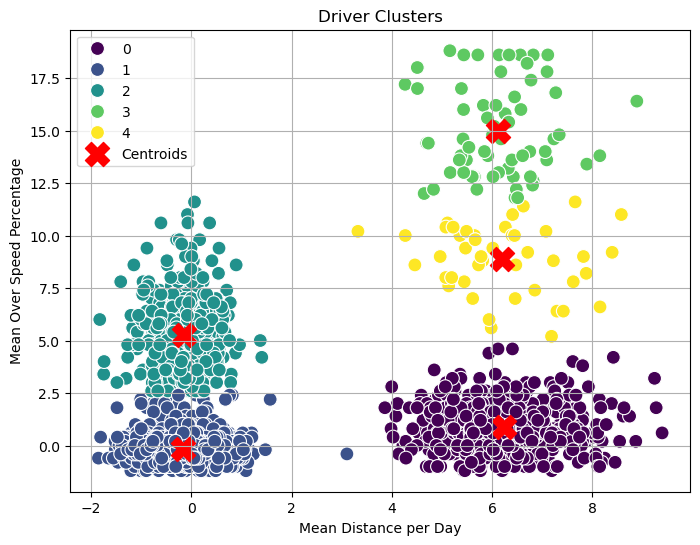

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean_dist_day', y='mean_over_speed_perc', hue='cluster', data=df_scaled, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Driver Clusters')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over Speed Percentage')
plt.legend()
plt.grid(True)
plt.savefig("Driver Clusters_5", dpi=1080)
plt.show()


In [40]:
df_scaled["cluster"].unique()

array([2, 1, 3, 4, 0])

In [43]:
def assign_incentives(cluster):
    if cluster == 0:
        return 'Highest Incentive'
    elif cluster == 1:
        return 'Moderate Incentive'
    elif cluster == 2:
        return 'Low Incentive'
    elif cluster == 3:
        return 'Very Low Incentive'
    elif cluster == 4:
        return 'No Incentive'
    else:
        return 'Invalid Cluster'  # Fallback case for any unexpected cluster value


In [44]:
# Apply the function to determine incentives based on the cluster assignment
df_scaled['Incentive'] = df_scaled['cluster'].apply(assign_incentives)

# Group drivers by cluster and summarize relevant statistics
cluster_summary = df_scaled.groupby('cluster').agg({
    'Incentive': 'first',  # Assuming each cluster has a consistent incentive level
    'mean_dist_day': ['mean', 'std'],  # Calculate mean and standard deviation for daily distance
    'mean_over_speed_perc': ['mean', 'std']  # Calculate mean and standard deviation for overspeed percentage
}).reset_index()

# Display the aggregated data including incentives
cluster_summary

cluster           Incentive mean_dist_day           mean_over_speed_perc  \
                        first          mean       std                 mean   
0       0   Highest Incentive      6.228588  0.925144             0.861248   
1       1  Moderate Incentive     -0.162539  0.503096            -0.159193   
2       2       Low Incentive     -0.143496  0.478885             5.273068   
3       3  Very Low Incentive      6.125945  0.894524            14.972308   
4       4        No Incentive      6.199777  1.146722             8.893333   

             
        std  
0  1.035093  
1  0.465383  
2  1.738355  
3  2.177119  
4  1.607143

In [46]:
# Add the 'cluster' column from df_scaled to the original df
df['cluster'] = df_scaled['cluster']

# Display the first few rows of df to verify the addition
df.head()

,mean_dist_day,mean_over_speed_perc,cluster,Agg_Cluster
0,71.24,28,2,1
1,52.53,25,2,1
2,64.54,27,2,1
3,55.69,22,2,1
4,54.58,25,2,1


In [49]:
def assign_incentives(cluster):
    if cluster == 0:
        return 'Highest Incentive'
    elif cluster == 1:
        return 'Moderate Incentive'
    elif cluster == 2:
        return 'Low Incentive'
    elif cluster == 3:
        return 'No Incentive'
    elif cluster == 4:
        return 'No Incentive'
    else:
        return 'Invalid Cluster'  # Fallback case for any unexpected cluster value


In [50]:
# Apply the function to determine incentives based on the cluster assignment
df['Incentive'] = df['cluster'].apply(assign_incentives)

# Group drivers by cluster and summarize relevant statistics
cluster_summary = df.groupby('cluster').agg({
    'Incentive': 'first',  # Assuming each cluster has a consistent incentive level
    'mean_dist_day': ['mean', 'std'],  # Calculate mean and standard deviation for daily distance
    'mean_over_speed_perc': ['mean', 'std']  # Calculate mean and standard deviation for overspeed percentage
}).reset_index()

# Display the aggregated data including incentives
cluster_summary

cluster           Incentive mean_dist_day            mean_over_speed_perc  \
                        first          mean        std                 mean   
0       0   Highest Incentive    180.299768  18.859058            10.306241   
1       1  Moderate Incentive     50.016637  10.255611             5.204037   
2       2       Low Incentive     50.404824   9.762079            32.365340   
3       3        No Incentive    178.207385  18.234865            80.861538   
4       4        No Incentive    179.712444  23.375924            50.466667   

              
         std  
0   5.175465  
1   2.326916  
2   8.691776  
3  10.885594  
4   8.035716

### The table shows clusters of drivers categorized by their incentives, daily driving behavior, and speeding tendencies. Here's a breakdown of the insights based on the table:

### Cluster Insights:
1. **Cluster 0 - Highest Incentive**:
   - **Mean Distance (180.30)**: These drivers cover the longest distances daily on average.
   - **Mean Overspeed Percentage (10.31%)**: Despite the high mileage, they maintain relatively safe driving behavior with a low overspeed percentage.
   - **Standard Deviations**: The moderate standard deviations indicate consistent driving patterns.
   - **Incentive**: This group receives the highest incentives due to their disciplined driving over long distances, balancing safety with extensive travel.

2. **Cluster 1 - Moderate Incentive**:
   - **Mean Distance (50.02)**: This group drives moderate distances daily.
   - **Mean Overspeed Percentage (5.20%)**: They maintain low overspeed percentages, indicating safe driving habits.
   - **Standard Deviations**: Both distance and overspeed stats have low variance, suggesting consistent and predictable behavior.
   - **Incentive**: This group receives moderate incentives, rewarding consistent and safe driving over moderate distances.

3. **Cluster 2 - Low Incentive**:
   - **Mean Distance (50.40)**: Similar distance range to Cluster 1.
   - **Mean Overspeed Percentage (32.37%)**: High overspeeding behavior, indicating risky driving despite the moderate distances.
   - **Standard Deviations**: The high standard deviation in overspeed percentage indicates erratic driving patterns.
   - **Incentive**: Due to the higher risk behavior, this group receives lower incentives despite covering similar distances as Cluster 1.

4. **Cluster 3 - No Incentive**:
   - **Mean Distance (178.21)**: Drivers in this cluster also cover long distances daily, similar to Cluster 0.
   - **Mean Overspeed Percentage (80.86%)**: They exhibit extremely risky driving with high overspeeding percentages.
   - **Standard Deviations**: Both distance and overspeed stats have high variance, indicating inconsistent and aggressive driving.
   - **Incentive**: Given the risky behavior, this group receives very low incentives, despite their extensive travel.

5. **Cluster 4 - No Incentive**:
   - **Mean Distance (179.71)**: This group also covers long distances daily.
   - **Mean Overspeed Percentage (50.47%)**: While they drive considerable distances, they maintain moderately high overspeed percentages.
   - **Standard Deviations**: High variability in overspeeding indicates inconsistent driving behavior.
   - **Incentive**: Due to the mix of high distance and moderately risky behavior, this group receives no incentives.

### Overall Insights:
- **Risk vs. Reward**: The incentive structure prioritizes safe driving (low overspeed percentage) over distance. Even if drivers cover long distances (like Clusters 0, 3, and 4), their rewards decrease if they engage in risky behavior.
- **Consistency Matters**: Clusters with low standard deviations (e.g., Cluster 1) are rewarded more consistently due to predictable and safe driving behavior.
- **Balancing Incentives**: The incentive scheme is designed to encourage safe driving, even for those covering long distances. However, high-risk drivers (e.g., Cluster 2) are disincentivized, even if they drive less.

This analysis highlights a well-structured incentive model that effectively balances safe driving with performance metrics like distance.